<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4662 entries, 0 to 4661
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4662 non-null   object 
 1   High       4662 non-null   float64
 2   Low        4662 non-null   float64
 3   Open       4662 non-null   float64
 4   Close      4662 non-null   float64
 5   Adj Close  4662 non-null   float64
 6   count      4662 non-null   float64
dtypes: float64(6), object(1)
memory usage: 255.1+ KB


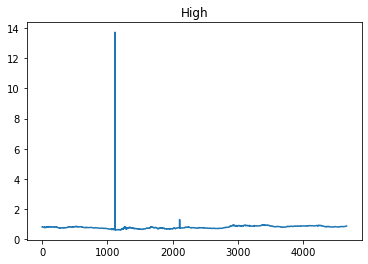

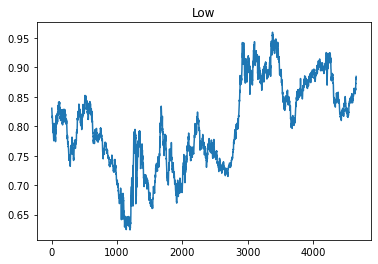

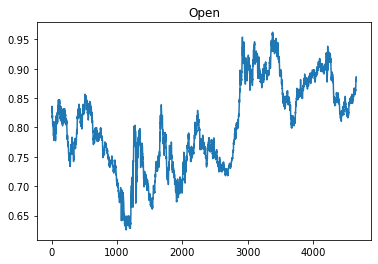

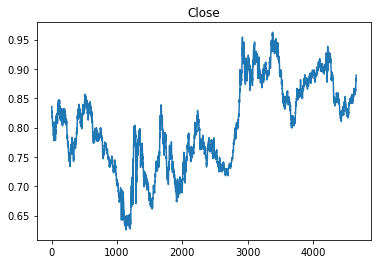

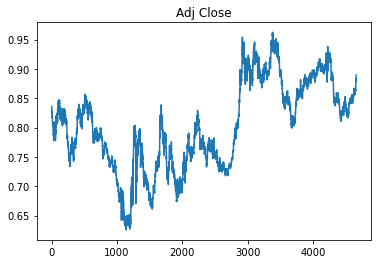

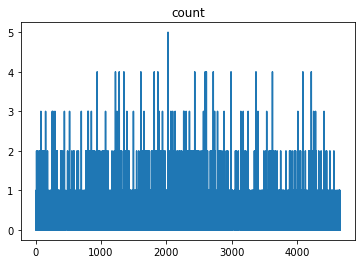

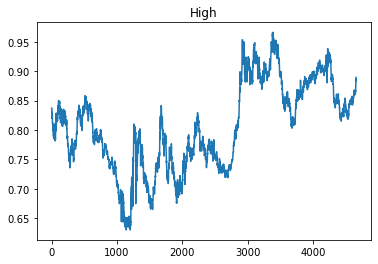

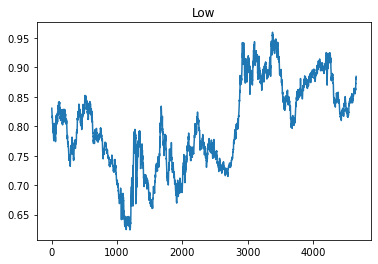

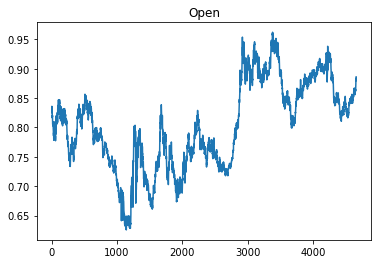

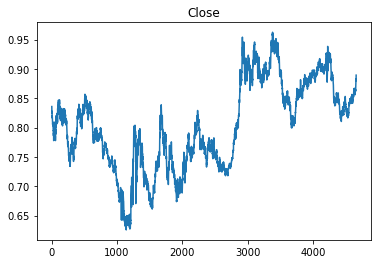

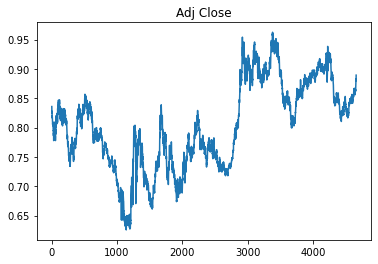

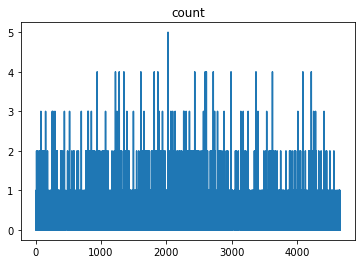

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data_collection/data.csv")


df.drop("Volume",1,inplace=True)

df.info()

for i in df.columns[1:]:
    df[i].plot()
    plt.title(i)
    plt.show()
    

df.drop(df[df.High > 1].index, inplace=True)

for i in df.columns[1:]:
    df[i].plot()
    plt.title(i)
    plt.show()

In [2]:
df.head()

,Date,High,Low,Open,Close,Adj Close,count
0,2003-12-01,0.83724,0.83056,0.83098,0.83577,0.83577,0.0
1,2003-12-02,0.83710,0.82583,0.83605,0.82720,0.82720,0.0
2,2003-12-03,0.82802,0.82440,0.82713,0.82488,0.82488,0.0
3,2003-12-04,0.83029,0.82345,0.82508,0.82775,0.82775,1.0
4,2003-12-05,0.82878,0.82028,0.82795,0.82055,0.82055,1.0


In [3]:
df2 = df.drop(["Date", "Adj Close", "count"],1)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4660 entries, 0 to 4661
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    4660 non-null   float64
 1   Low     4660 non-null   float64
 2   Open    4660 non-null   float64
 3   Close   4660 non-null   float64
dtypes: float64(4)
memory usage: 182.0 KB


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()

In [7]:

X_train = df2.iloc[:-40]
X_test = df2.iloc[-40:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)


In [8]:
len(scaled_train)

4620

In [9]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 20  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (4600, 20, 4).
trainY shape == (4600, 1).


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [11]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 64)            17664     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [12]:
es_callback = EarlyStopping(monitor="loss", patience=5)

In [13]:
history = model.fit(trainX, trainY, epochs=150, batch_size=40, verbose=1)

Epoch 1/150
115/115 [==============================] - 2s 9ms/step - loss: 0.1026
Epoch 2/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0144
Epoch 3/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0125
Epoch 4/150
115/115 [==============================] - 1s 8ms/step - loss: 0.0114
Epoch 5/150
115/115 [==============================] - 1s 8ms/step - loss: 0.0117
Epoch 6/150
115/115 [==============================] - 1s 8ms/step - loss: 0.0106
Epoch 7/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0099
Epoch 8/150
115/115 [==============================] - 1s 8ms/step - loss: 0.0096
Epoch 9/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0092
Epoch 10/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0082
Epoch 11/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0078
Epoch 12/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0068
Epoch 13/150


115/115 [==============================] - 1s 9ms/step - loss: 2.2003e-04
Epoch 97/150
115/115 [==============================] - 1s 9ms/step - loss: 2.1663e-04
Epoch 98/150
115/115 [==============================] - 1s 9ms/step - loss: 2.1188e-04
Epoch 99/150
115/115 [==============================] - 1s 9ms/step - loss: 2.1124e-04
Epoch 100/150
115/115 [==============================] - 1s 9ms/step - loss: 2.1369e-04
Epoch 101/150
115/115 [==============================] - 1s 9ms/step - loss: 2.1177e-04
Epoch 102/150
115/115 [==============================] - 1s 9ms/step - loss: 2.2061e-04
Epoch 103/150
115/115 [==============================] - 1s 9ms/step - loss: 2.1699e-04
Epoch 104/150
115/115 [==============================] - 1s 9ms/step - loss: 2.2112e-04
Epoch 105/150
115/115 [==============================] - 1s 9ms/step - loss: 2.2147e-04
Epoch 106/150
115/115 [==============================] - 1s 9ms/step - loss: 2.1578e-04
Epoch 107/150
115/115 [==========================

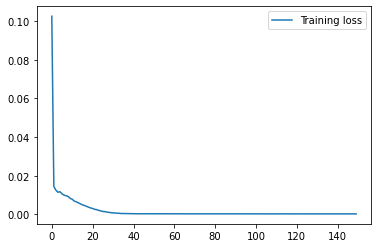

In [14]:
plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [19]:
testX = []
testY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 20  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('trainX shape == {}.'.format(testX.shape))
print('trainY shape == {}.'.format(testY.shape))

trainX shape == (20, 20, 4).
trainY shape == (20, 1).


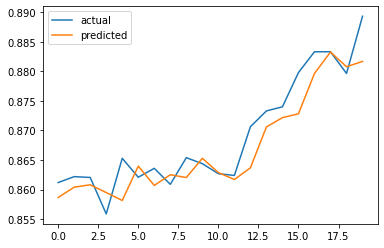

In [31]:
plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))

In [34]:
from keras.layers import Bidirectional

In [39]:
model = Sequential()
model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')


In [40]:
history = model.fit(trainX, trainY, epochs=150, batch_size=40, verbose=1, callbacks=[es_callback])

Epoch 1/150
114/114 [==============================] - 6s 15ms/step - loss: 0.0273
Epoch 2/150
114/114 [==============================] - 2s 15ms/step - loss: 0.0044
Epoch 3/150
114/114 [==============================] - 2s 15ms/step - loss: 0.0034
Epoch 4/150
114/114 [==============================] - 2s 16ms/step - loss: 0.0031
Epoch 5/150
114/114 [==============================] - 2s 16ms/step - loss: 0.0028
Epoch 6/150
114/114 [==============================] - 2s 17ms/step - loss: 0.0028
Epoch 7/150
114/114 [==============================] - 2s 17ms/step - loss: 0.0028
Epoch 8/150
114/114 [==============================] - 2s 17ms/step - loss: 0.0025
Epoch 9/150
114/114 [==============================] - 2s 18ms/step - loss: 0.0023
Epoch 10/150
114/114 [==============================] - 2s 17ms/step - loss: 0.0024
Epoch 11/150
114/114 [==============================] - 2s 16ms/step - loss: 0.0021
Epoch 12/150
114/114 [==============================] - 2s 16ms/step - loss: 0.0022
E

114/114 [==============================] - 2s 16ms/step - loss: 6.8497e-05
Epoch 96/150
114/114 [==============================] - 2s 16ms/step - loss: 5.9419e-05
Epoch 97/150
114/114 [==============================] - 2s 16ms/step - loss: 6.9822e-05
Epoch 98/150
114/114 [==============================] - 2s 16ms/step - loss: 5.9901e-05


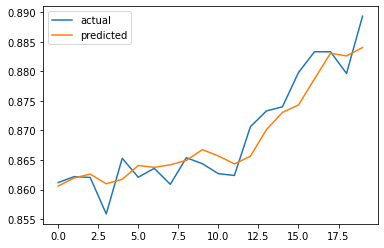

In [41]:
plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))

In [53]:
scaler = MinMaxScaler()
X_train = df2.iloc[:-80]
X_test = df2.iloc[-80:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

In [54]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 60  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (4520, 60, 4).
trainY shape == (4520, 1).


In [55]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 64)            17664     
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(trainX, trainY, epochs=150, batch_size=40, verbose=1, callbacks=[es_callback])

Epoch 1/150
113/113 [==============================] - 7s 36ms/step - loss: 0.0630
Epoch 2/150
113/113 [==============================] - 4s 36ms/step - loss: 0.0137
Epoch 3/150
113/113 [==============================] - 4s 36ms/step - loss: 0.0135
Epoch 4/150
113/113 [==============================] - 4s 37ms/step - loss: 0.0122
Epoch 5/150
113/113 [==============================] - 5s 47ms/step - loss: 0.0116
Epoch 6/150
113/113 [==============================] - 5s 40ms/step - loss: 0.0109
Epoch 7/150
113/113 [==============================] - 4s 38ms/step - loss: 0.0101
Epoch 8/150
113/113 [==============================] - 4s 39ms/step - loss: 0.0093
Epoch 9/150
113/113 [==============================] - 4s 39ms/step - loss: 0.0090
Epoch 10/150
113/113 [==============================] - 4s 37ms/step - loss: 0.0077
Epoch 11/150
113/113 [==============================] - 5s 45ms/step - loss: 0.0070
Epoch 12/150
113/113 [==============================] - 5s 42ms/step - loss: 0.0063
E

In [57]:
testX = []
testY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 60  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (20, 60, 4).
testY shape == (20, 1).


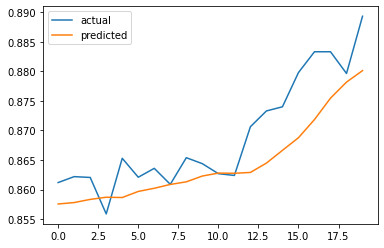

In [58]:
plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))

In [59]:
scaler = MinMaxScaler()
X_train = df2.iloc[:-140]
X_test = df2.iloc[-140:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

In [60]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 120  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (4400, 120, 4).
trainY shape == (4400, 1).


In [61]:
model = Sequential()
model.add(LSTM(120, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(60, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 120, 120)          60000     
_________________________________________________________________
lstm_13 (LSTM)               (None, 60)                43440     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 61        
Total params: 103,501
Trainable params: 103,501
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model.fit(trainX, trainY, epochs=150, batch_size=40, verbose=1, callbacks=[es_callback])

Epoch 1/150
110/110 [==============================] - 22s 172ms/step - loss: 0.0565
Epoch 2/150
110/110 [==============================] - 18s 168ms/step - loss: 0.0088
Epoch 3/150
110/110 [==============================] - 18s 165ms/step - loss: 0.0083
Epoch 4/150
110/110 [==============================] - 18s 165ms/step - loss: 0.0079
Epoch 5/150
110/110 [==============================] - 18s 164ms/step - loss: 0.0073
Epoch 6/150
110/110 [==============================] - 18s 164ms/step - loss: 0.0070
Epoch 7/150
110/110 [==============================] - 18s 165ms/step - loss: 0.0067
Epoch 8/150
110/110 [==============================] - 18s 165ms/step - loss: 0.0067
Epoch 9/150
110/110 [==============================] - 18s 166ms/step - loss: 0.0061
Epoch 10/150
110/110 [==============================] - 18s 164ms/step - loss: 0.0055
Epoch 11/150
110/110 [==============================] - 18s 165ms/step - loss: 0.0051
Epoch 12/150
110/110 [==============================] - 18s 165

In [63]:
testX = []
testY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 120  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (20, 120, 4).
testY shape == (20, 1).


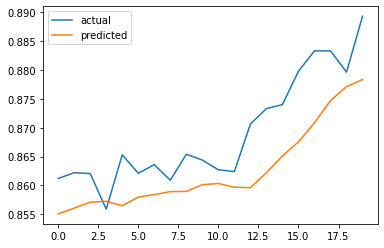

In [64]:
plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted')) 